In [39]:
# Import the necessary Python libraries
import numpy as np
import matplotlib.pyplot as plt
import json

In [40]:
# Configuration name.
CONFIG_FILE = "load-config.json"
CONFIG = json.load(open(CONFIG_FILE))

# Results directory.
DATA_DIR = "results/"

# Service names parsed from load-config.json
SERVICES = []
for service in CONFIG["services"]:
    SERVICES.append(service["name"])
    
# Service hit rates.
# Number of workers is equal to rate / 10.
RATES = [10, 1000]


In [41]:
def read_datafile(idx, name, rate):
    """
    Reads the complete CSV file for a single load test, returning 
    an array containing the latency at each timestep.
    """
    
    # Make file name.
    fileName = DATA_DIR + str(idx) + "-" + str(name) + "-rate" + str(rate) + ".csv"
    
    # Names of all headers.
    # headerNames=['latency (microseconds)', 'status', 'timestamp', 'index']
    headerNames=None
    
    # Custom converter for transforming binary tuple mask into a reversed string representation.
    # customConverters = {2: lambda x: str(x).count("1")}
    
    # Read data
    try:
        return np.loadtxt(fileName, delimiter=",", usecols=[0], dtype='int')
    except FileNotFoundError:
        print(fname)
        print("File not found! Returning empty array.")
        return np.empty()

def plotLatencyOverTime(data, label):
    """
    Creates a figure containing plots for 
    each iteration of a single experiment data set.
    """

    # Provide axis labels for the figure.
    plt.plot(data)
    plt.ylabel("Latency")
    plt.xlabel("Time")
    print(label)
    print("Min Latency: " + str(np.min(data)))
    print("Max Latency: " + str(np.max(data)))
    print("Median Latency: " + str(np.median(data)))
    
    # Show the figure.
    plt.show()

Spring-Boot-Tomcat Rate: 10
Min Latency: 289
Max Latency: 6182
Median Latency: 362.0


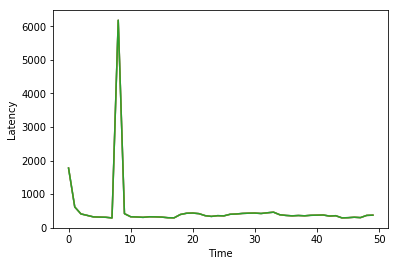

Spring-Boot-Tomcat Rate: 1000
Min Latency: 160
Max Latency: 20051
Median Latency: 295.0


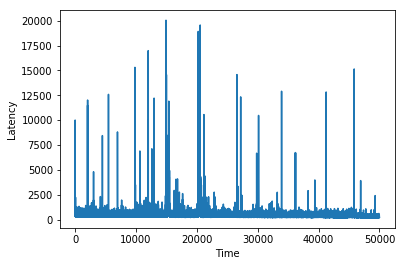

Green-Lightning Rate: 10
Min Latency: 189
Max Latency: 2831
Median Latency: 270.0


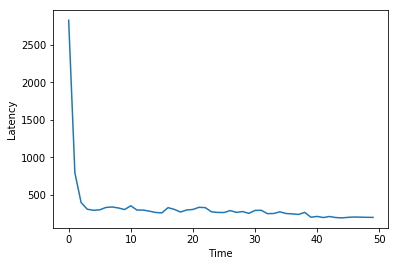

Green-Lightning Rate: 1000
Min Latency: 81
Max Latency: 15584
Median Latency: 196.0


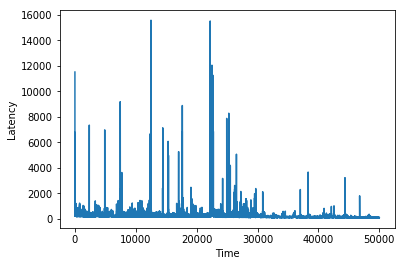

In [42]:
def createAllStaticFigures():
    """
    Creates plot figures for every static experiment.
    """
    
    # Iterate over all configurations of robots, request probabilities, and topologies.
    idx = 1
    for service in SERVICES:
        for rate in RATES:
            plotLatencyOverTime(read_datafile(idx, service, rate), service + " Rate: " + str(rate))
        idx = idx + 1
                
createAllStaticFigures()